In [1]:
import pandas as pd

sheet_name = 'Transaction Data'

data = pd.read_excel('Banking Case - Data.xlsx',sheet_name=sheet_name,engine='openpyxl')

In [2]:
data.head()

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [3]:
sheet_name = 'Customer Demographics'

data_customer = pd.read_excel('Banking Case - Data.xlsx',sheet_name=sheet_name,engine='openpyxl')

data_customer.head()

,Customer_number,age,job,marital,education,Annual Income,Gender
0,1001,58,management,married,tertiary,839368,M
1,1002,44,technician,single,secondary,1452858,M
2,1003,33,entrepreneur,married,NaN,4851383,F
3,1004,47,blue collar,married,unknown,3207754,F
4,1005,33,unknown,single,unknown,2562322,M


In [4]:
data.isnull().sum()

Sno                  0
Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45156 non-null  object 
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 4.8+ MB


In [6]:
data.shape

(45211, 14)

In [7]:
(data.isnull().sum() / len(data)) * 100

Sno                 0.000000
Customer_number     0.000000
Insurance           0.000000
balance             0.121652
housing             0.000000
loan                0.017695
contact             0.095110
duration            0.086262
campaign            0.000000
last_contact_day    0.000000
previous            0.000000
poutcome            0.033178
Term Deposit        0.017695
Count_Txn           0.002212
dtype: float64

In [10]:
columns_with_missing = ['balance', 'loan', 'contact', 'duration', 'poutcome', 'Term Deposit', 'Count_Txn']

data = data.dropna(subset=columns_with_missing)

In [11]:
data.isnull().sum()

Sno                 0
Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

In [14]:
data_customer.isnull().sum()

Customer_number     0
age                 0
job                13
marital            18
education          21
Annual Income      17
Gender              0
dtype: int64

In [15]:
(data_customer.isnull().sum() / len(data_customer)) * 100

Customer_number    0.000000
age                0.000000
job                0.028754
marital            0.039813
education          0.046449
Annual Income      0.037601
Gender             0.000000
dtype: float64

In [17]:
columns_with_missing = ['job','marital','education','Annual Income','Gender']

data_customer = data_customer.dropna(subset=columns_with_missing)

In [18]:
data_customer.isnull().sum()

Customer_number    0
age                0
job                0
marital            0
education          0
Annual Income      0
Gender             0
dtype: int64

### Performing visualizations on Transactional Data

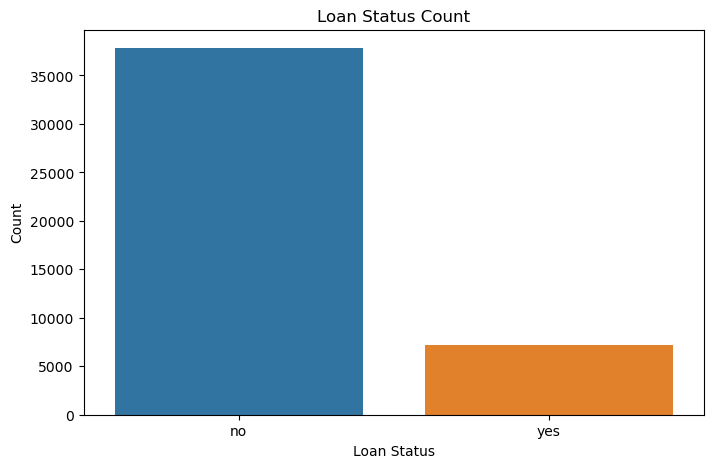

In [21]:
# Visualization 1: Count plot of 'loan' status
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='loan')
plt.title("Loan Status Count")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

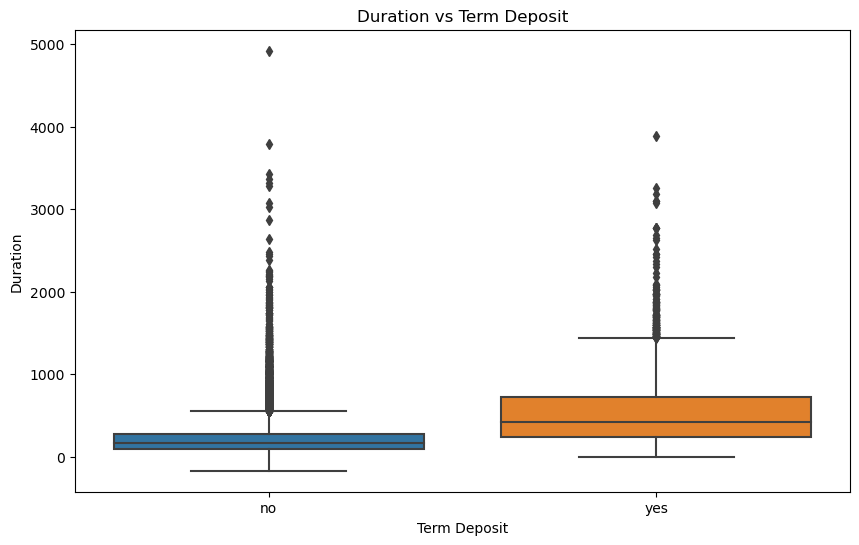

In [22]:
# Visualization 2: Box plot of 'duration' by 'Term Deposit'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Term Deposit', y='duration')
plt.title("Duration vs Term Deposit")
plt.xlabel("Term Deposit")
plt.ylabel("Duration")
plt.show()

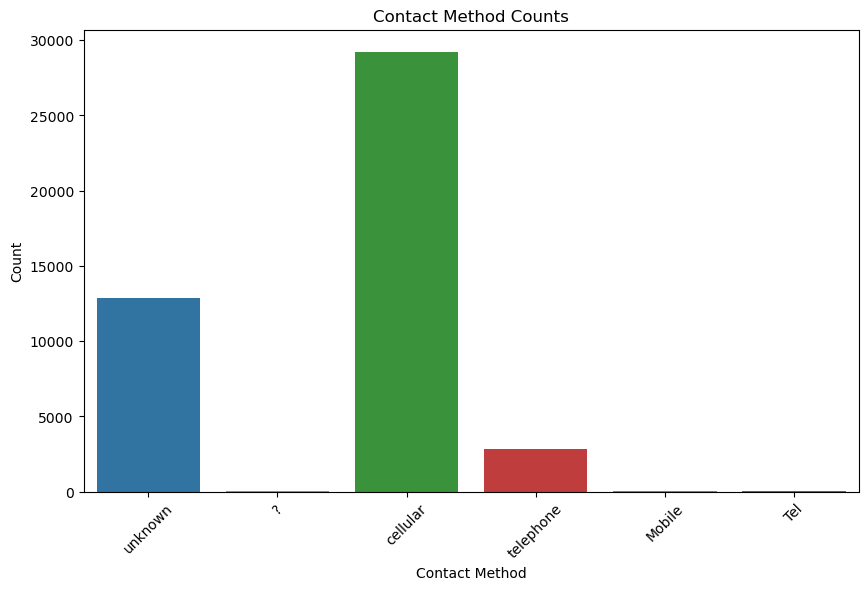

In [23]:
# Visualization 3: Count plot of 'contact' methods
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contact')
plt.title("Contact Method Counts")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

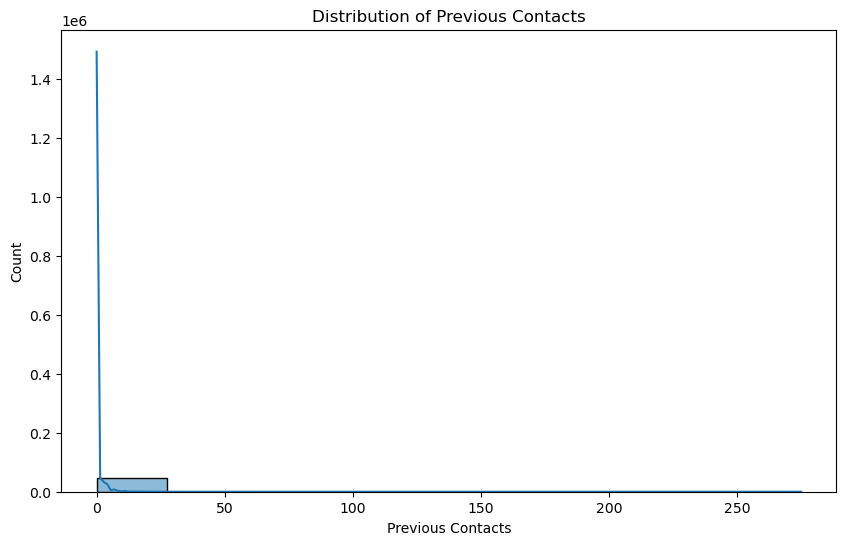

In [24]:
# Visualization 4: Distribution of 'previous' contacts
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='previous', bins=10, kde=True)
plt.title("Distribution of Previous Contacts")
plt.xlabel("Previous Contacts")
plt.ylabel("Count")
plt.show()

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_14932\2566826716.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


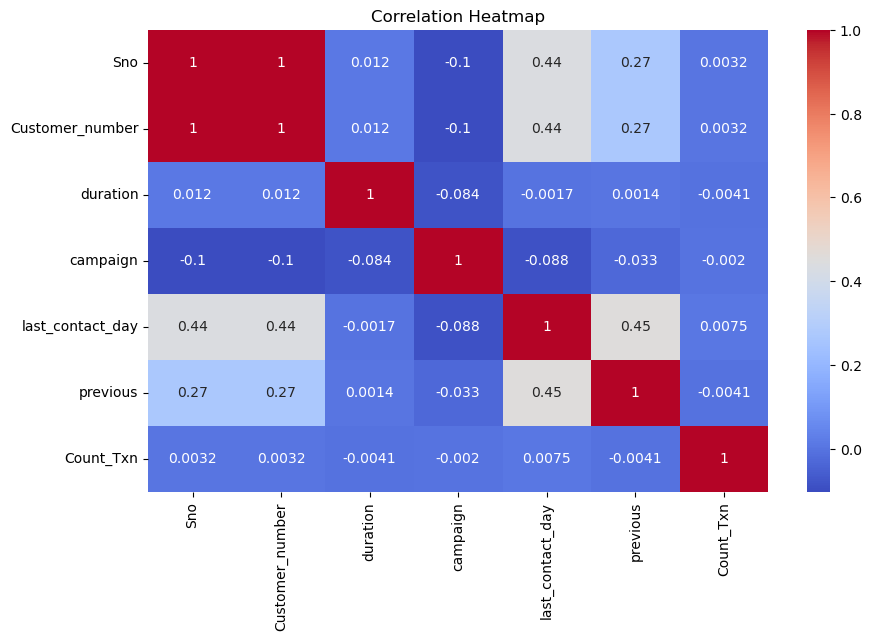

In [27]:
# Visualization 5: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

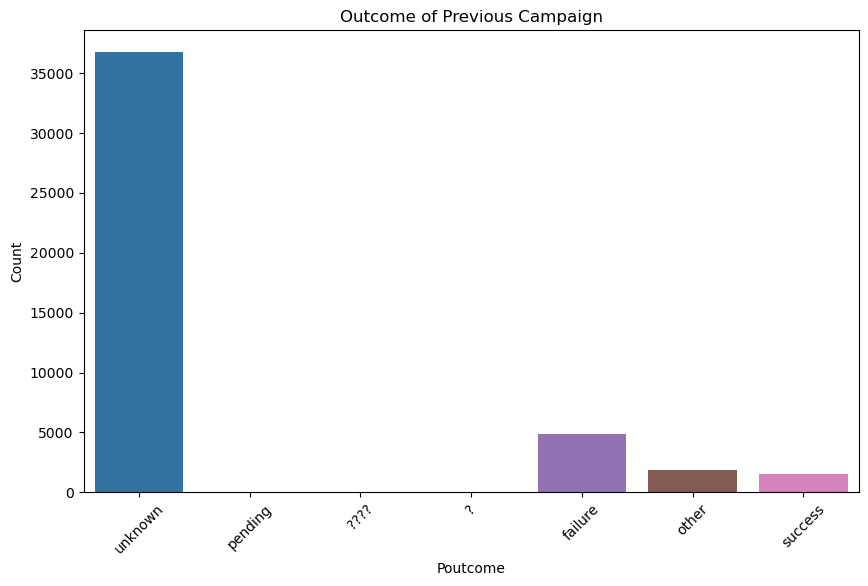

In [29]:
# Visualization 6: Count plot of 'poutcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='poutcome')
plt.title("Outcome of Previous Campaign")
plt.xlabel("Poutcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

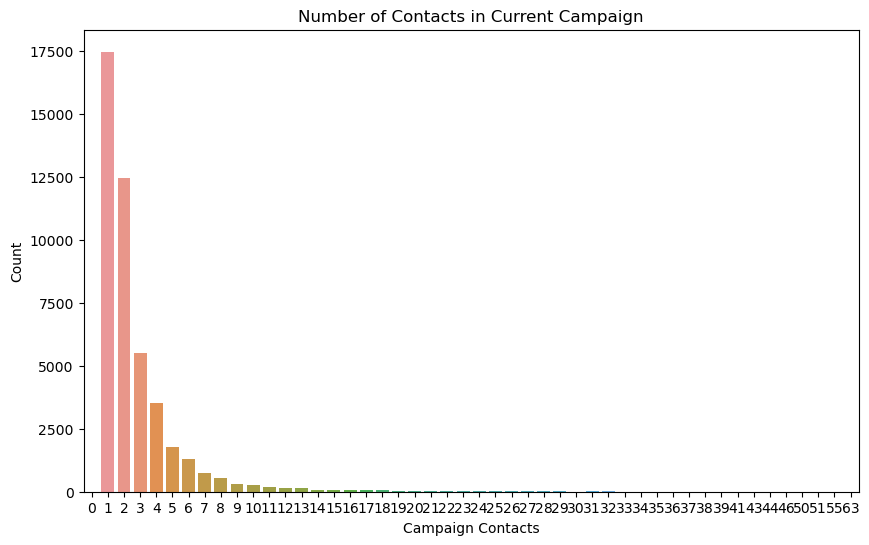

In [30]:
# Visualization 7: Count plot of 'campaign'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='campaign')
plt.title("Number of Contacts in Current Campaign")
plt.xlabel("Campaign Contacts")
plt.ylabel("Count")
plt.show()

### Performing visualization on Customer Data

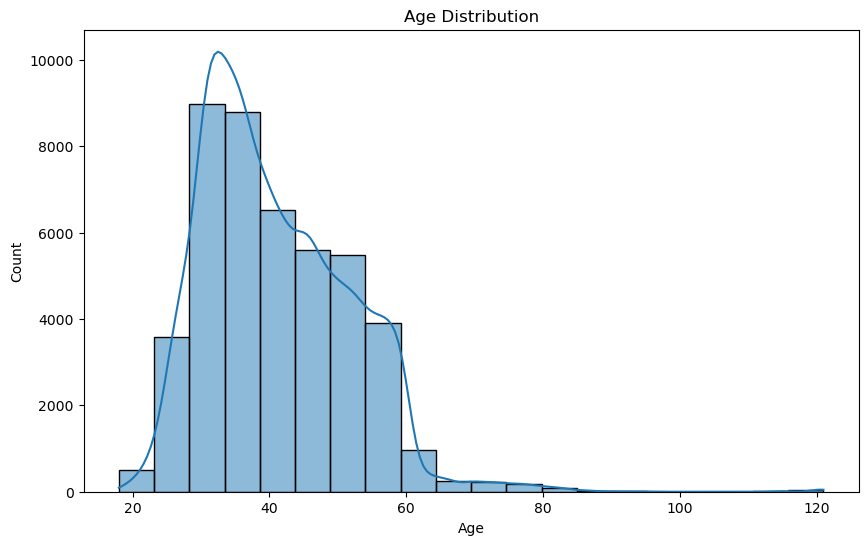

In [33]:
# Visualization 1: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_customer, x='age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

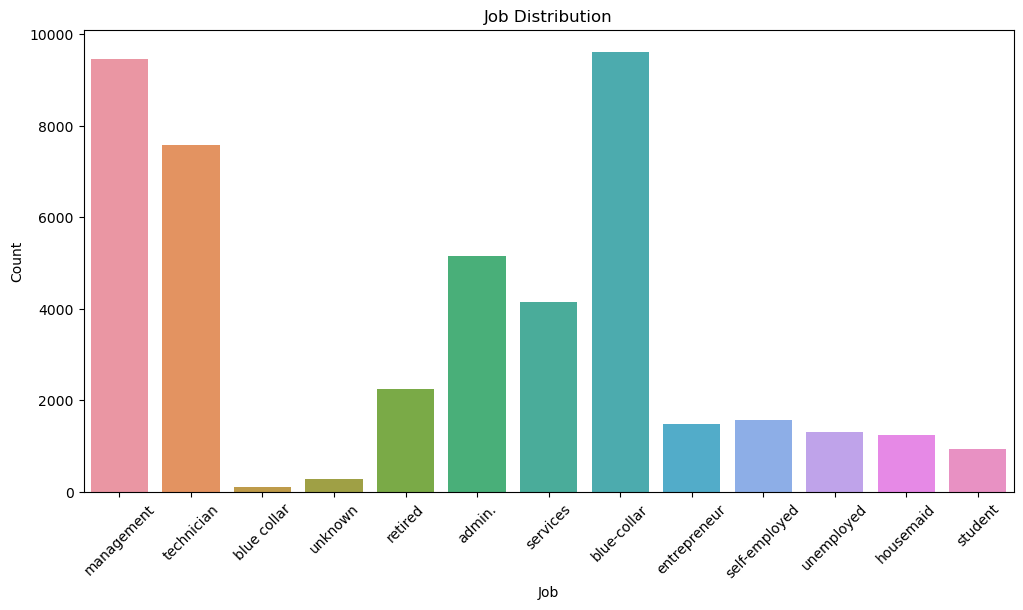

In [34]:
# Visualization 2: Count plot of 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_customer, x='job')
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

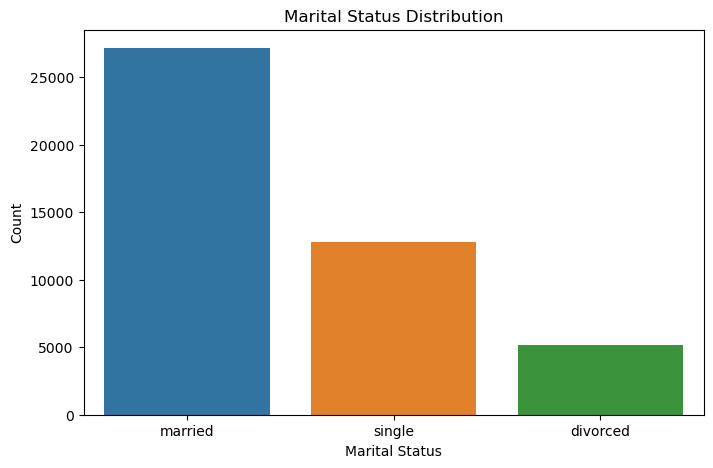

In [35]:
# Visualization 3: Count plot of 'marital' status
plt.figure(figsize=(8, 5))
sns.countplot(data=data_customer, x='marital')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

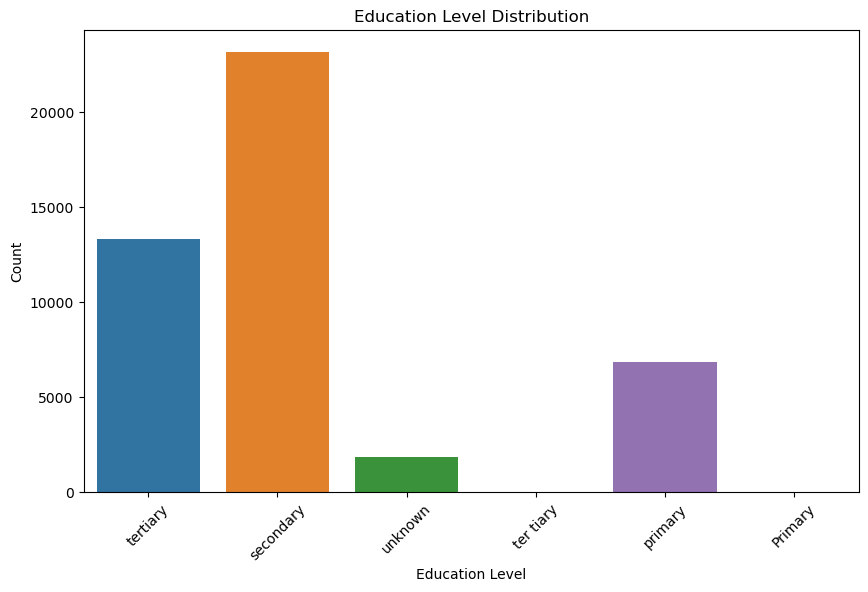

In [36]:
# Visualization 4: Count plot of 'education' level
plt.figure(figsize=(10, 6))
sns.countplot(data=data_customer, x='education')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

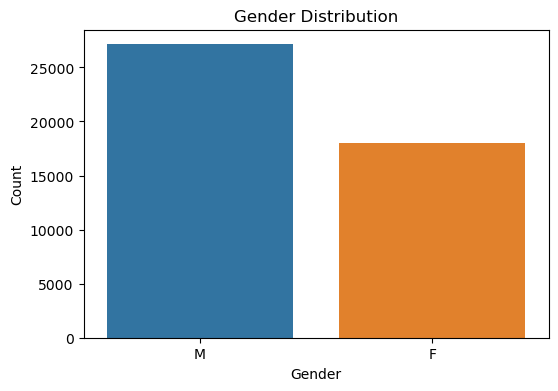

In [40]:
# Visualization 5: Count plot of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=data_customer, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

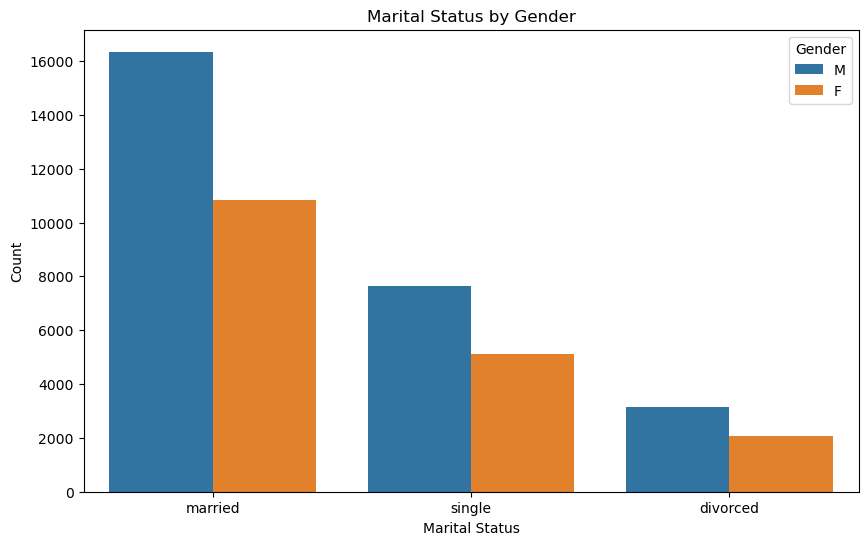

In [41]:
# Visualization 6: Count plot of 'marital' status by 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(data=data_customer, x='marital', hue='Gender')
plt.title("Marital Status by Gender")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

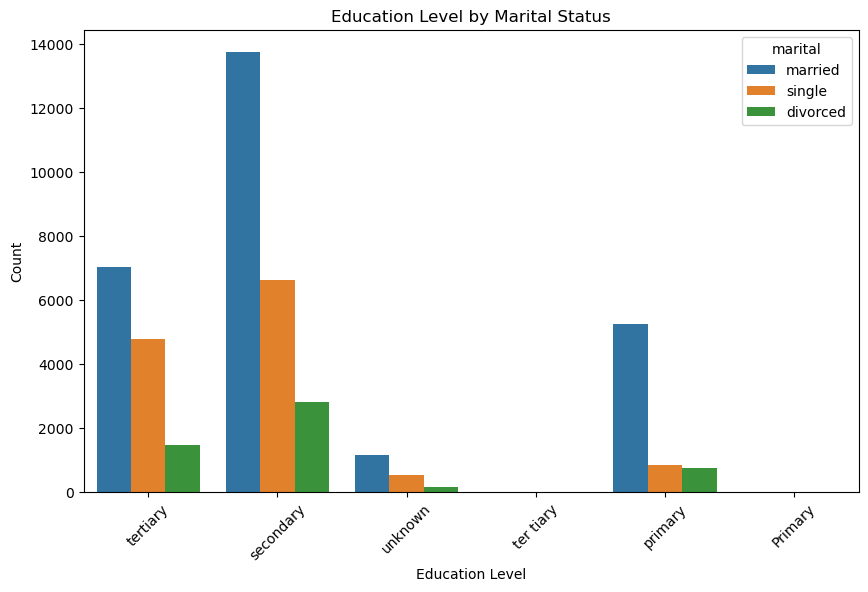

In [43]:
# Visualization 7: Count plot of 'education' level by 'marital' status
plt.figure(figsize=(10, 6))
sns.countplot(data=data_customer, x='education', hue='marital')
plt.title("Education Level by Marital Status")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [44]:
data.columns

Index(['Sno', 'Customer_number', 'Insurance', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Term Deposit', 'Count_Txn'],
      dtype='object')

In [46]:
data.corr()

C:\Users\Anju Reddy K\AppData\Local\Temp\ipykernel_14932\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sno,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn
Sno,1.000000,1.000000,0.011925,-0.102457,0.436778,0.270955,0.003180
Customer_number,1.000000,1.000000,0.011925,-0.102457,0.436778,0.270955,0.003180
duration,0.011925,0.011925,1.000000,-0.084115,-0.001666,0.001410,-0.004070
campaign,-0.102457,-0.102457,-0.084115,1.000000,-0.088363,-0.032609,-0.001980
last_contact_day,0.436778,0.436778,-0.001666,-0.088363,1.000000,0.453656,0.007537
previous,0.270955,0.270955,0.001410,-0.032609,0.453656,1.000000,-0.004106
Count_Txn,0.003180,0.003180,-0.004070,-0.001980,0.007537,-0.004106,1.000000


In [50]:
data.drop(['Sno','Customer_number'],axis=1,inplace=True)

In [51]:
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0
5,no,231,yes,no,unknown,139.0,1,2,0,unknown,no,490.0
6,no,447,yes,yes,unknown,217.0,1,2,0,unknown,no,411.0


In [52]:
data.isnull().sum()

Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

In [53]:
data.dtypes

Insurance            object
balance              object
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
dtype: object

In [58]:
# Convert 'insurance' column to binary integer form
data['Insurance'] = data['Insurance'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,0,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
3,0,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,0,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0
5,0,231,yes,no,unknown,139.0,1,2,0,unknown,no,490.0
6,0,447,yes,yes,unknown,217.0,1,2,0,unknown,no,411.0


In [59]:
data.isnull().sum()

Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

In [60]:
# Convert 'balance' column to numeric
data['balance'] = pd.to_numeric(data['balance'], errors='coerce')

data.dtypes

Insurance             int64
balance             float64
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
dtype: object

In [61]:
# Convert 'housing' column to binary integer form
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,0,29.0,1,no,unknown,151.0,1,2,0,unknown,no,326.0
3,0,1506.0,1,no,unknown,92.0,1,2,0,unknown,no,113.0
4,0,1.0,0,no,unknown,198.0,1,2,0,unknown,no,342.0
5,0,231.0,1,no,unknown,139.0,1,2,0,unknown,no,490.0
6,0,447.0,1,yes,unknown,217.0,1,2,0,unknown,no,411.0


In [62]:
# Convert 'insurance' column to binary integer form
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,0,29.0,1,0,unknown,151.0,1,2,0,unknown,no,326.0
3,0,1506.0,1,0,unknown,92.0,1,2,0,unknown,no,113.0
4,0,1.0,0,0,unknown,198.0,1,2,0,unknown,no,342.0
5,0,231.0,1,0,unknown,139.0,1,2,0,unknown,no,490.0
6,0,447.0,1,1,unknown,217.0,1,2,0,unknown,no,411.0


In [63]:
# Convert 'Term Deposit' column to binary integer form
data['Term Deposit'] = data['Term Deposit'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,0,29.0,1,0,unknown,151.0,1,2,0,unknown,0,326.0
3,0,1506.0,1,0,unknown,92.0,1,2,0,unknown,0,113.0
4,0,1.0,0,0,unknown,198.0,1,2,0,unknown,0,342.0
5,0,231.0,1,0,unknown,139.0,1,2,0,unknown,0,490.0
6,0,447.0,1,1,unknown,217.0,1,2,0,unknown,0,411.0


In [64]:
data.dtypes

Insurance             int64
balance             float64
housing               int64
loan                  int64
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit          int64
Count_Txn           float64
dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'contact' column
data['contact'] = label_encoder.fit_transform(data['contact'])

# Display the first few rows to confirm the encoding
print(data[['contact', 'contact']].head())

   contact  contact
1        5        5
3        5        5
4        5        5
5        5        5
6        5        5


In [66]:
data.head()

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
1,0,29.0,1,0,5,151.0,1,2,0,unknown,0,326.0
3,0,1506.0,1,0,5,92.0,1,2,0,unknown,0,113.0
4,0,1.0,0,0,5,198.0,1,2,0,unknown,0,342.0
5,0,231.0,1,0,5,139.0,1,2,0,unknown,0,490.0
6,0,447.0,1,1,5,217.0,1,2,0,unknown,0,411.0


In [68]:
data.dtypes

Insurance             int64
balance             float64
housing               int64
loan                  int64
contact               int32
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit          int64
Count_Txn           float64
dtype: object

In [69]:
# Fit and transform the 'contact' column
data['poutcome'] = label_encoder.fit_transform(data['poutcome'])

# Display the first few rows to confirm the encoding
print(data[['poutcome', 'poutcome']].head())

   poutcome  poutcome
1         6         6
3         6         6
4         6         6
5         6         6
6         6         6


In [70]:
data.dtypes

Insurance             int64
balance             float64
housing               int64
loan                  int64
contact               int32
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome              int32
Term Deposit          int64
Count_Txn           float64
dtype: object

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer

# Select features (X) and target (y)
X = data.drop(columns=['Term Deposit'])
y = data['Term Deposit']

In [75]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Make predictions
y_pred = clf.predict(X_test)

In [78]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 90.10989010989012
Confusion Matrix:
 [[7755  243]
 [ 648  363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7998
           1       0.60      0.36      0.45      1011

    accuracy                           0.90      9009
   macro avg       0.76      0.66      0.70      9009
weighted avg       0.89      0.90      0.89      9009

